In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline
from datetime import datetime
import baostock as bs

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645 entries, 2022-03-27 to 2009-10-18
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon Emissions Futures   645 non-null    float64
 1   Brent Oil Futures          645 non-null    float64
 2   Natural Gas Futures        645 non-null    float64
 3   DJ Commodity Energy Index  404 non-null    float64
 4   SPX                        645 non-null    float64
 5   Euro Stoxx 50              645 non-null    float64
dtypes: float64(6)
memory usage: 35.3 KB


In [6]:
df.describe()

,Carbon Emissions Futures,Brent Oil Futures,Natural Gas Futures,DJ Commodity Energy Index,SPX,Euro Stoxx 50
count,645.000000,645.000000,645.000000,404.000000,645.000000,645.000000
mean,17.471070,76.689891,3.283989,89.215173,2295.916636,3166.426264
std,16.670466,25.745369,0.913554,23.827405,939.515052,483.087013
min,3.920000,21.440000,1.495000,34.717600,1022.580000,2026.030000
25%,6.750000,55.620000,2.650000,72.899425,1465.770000,2833.060000
50%,11.100000,72.610000,3.044000,86.444550,2091.580000,3164.210000
75%,22.180000,105.020000,3.931000,101.189725,2830.710000,3495.190000
max,96.430000,126.650000,6.135000,187.466800,4766.180000,4370.330000


In [7]:
dailyreturn = df.pct_change()

In [8]:
dailyreturn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645 entries, 2022-03-27 to 2009-10-18
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon Emissions Futures   644 non-null    float64
 1   Brent Oil Futures          644 non-null    float64
 2   Natural Gas Futures        644 non-null    float64
 3   DJ Commodity Energy Index  644 non-null    float64
 4   SPX                        644 non-null    float64
 5   Euro Stoxx 50              644 non-null    float64
dtypes: float64(6)
memory usage: 35.3 KB


In [9]:
dailyreturn.describe()

,Carbon Emissions Futures,Brent Oil Futures,Natural Gas Futures,DJ Commodity Energy Index,SPX,Euro Stoxx 50
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,-0.000389,0.000767,0.001781,0.000514,-0.001975,-0.000059
std,0.068542,0.049539,0.064707,0.039528,0.022738,0.029231
min,-0.217722,-0.269129,-0.196157,-0.206473,-0.107953,-0.098718
25%,-0.037805,-0.022737,-0.040480,-0.010957,-0.013884,-0.016246
50%,-0.004581,-0.003344,0.000134,0.000000,-0.003318,-0.002653
75%,0.031462,0.020727,0.038683,0.008505,0.007256,0.014276
max,0.473815,0.337371,0.331091,0.296887,0.176188,0.249824


<AxesSubplot:>

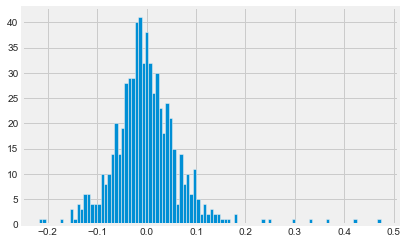

In [10]:
# Value at Risk method 1: using historical data
dailyreturn['Carbon Emissions Futures'].hist(bins = 100)

In [11]:
dailyreturn['Carbon Emissions Futures'].quantile(0.01)

-0.14313341811270192

In [12]:
# Value at Risk method 2: using Monte Carlo Simulated data
days = 365
dt = 1 / 365
mu = dailyreturn['Carbon Emissions Futures'].mean()
sigma = dailyreturn['Carbon Emissions Futures'].std()

In [13]:
def simulate (start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma* np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * drift[x] + shock[x])
    return price

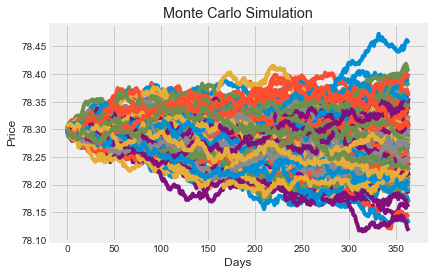

In [14]:
start_price = 78.30

for run in range(100):
    plt.plot(simulate(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation')
plt.savefig('Monte Carlo Simulation')

In [15]:
runs = 1000
simulation = np.zeros(runs)
for run in range(runs):
    simulation [run] = simulate(start_price, days, mu, sigma)[days-1]

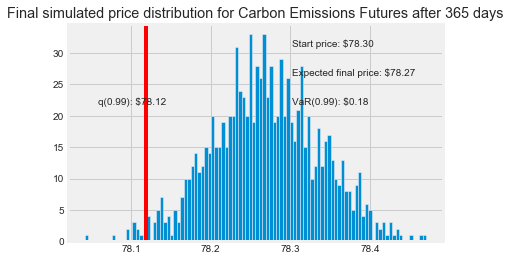

In [16]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=100)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Expected final price: $%.2f" % simulation.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final simulated price distribution for Carbon Emissions Futures after %s days" %days, weight='bold')

plt.savefig('Carbon Price Forecast.png')